# Candidate models for ML finance

> This notebook tries to understand and explain basic candidate models for predicting stock prices, along with their assumptions and theoritical explanations

## CAPM

> **CAPM** tries to calculate the expected return of an an asset price. It uses 3 things:
1. Expected market return ( say S&P 500 in the USA which aggregates top 500 tech companies)
2. Return from a risk free security or an asset. (Say US bond treasury rate)
3. Asset's correlation or sensitivity to the market return (say S&P 500). This is also called Beta.


**Formula for CAPM**:
    
![CAPM Model](../Desktop/capm_model.png)

Terms and explanation:

* R<sub>f</sub> - Risk free asset return. This is expected to have zero standard deviation.  An example is us treasury bond yield
* ER<sub>m</sub> Expected return of investment from market (Say S&P 500) return
* B<sub>i</sub> Assets correlation with market return

The beta coefficient can be interpreted as follows:

> β =1 exactly as volatile as the market β >1 more volatile than the market β <1>0 less volatile than the market β =0 uncorrelated to the market β <0 negatively correlated to the marke



In [1]:
pip install getFamaFrenchFactors

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import getFamaFrenchFactors as gff
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
TSLA = 'TSLA'
SP500 = 'SPY'
start_date = datetime(2021,1,1)
end_date = datetime(2022,12,31)
df_tsla = yf.download(TSLA,start_date,end_date)
df_sp500 = yf.download(SP500,start_date,end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
def calculate_daily_return(dataframe):
    rows = dataframe.shape[0]
    
    daily_returns = [0]
    for i in range(1,rows):
        # Percentage change in stock price per day
        daily_returns.append(((dataframe.iloc[i]['Close'] - dataframe.iloc[i-1]['Close']) / dataframe.iloc[i-1]['Close'] ) * 100) 
    # Since no data available before 0
    
    dataframe['Daily_Returns'] = daily_returns
    
    return dataframe

In [4]:
df_tsla.iloc[0]

Open         2.398200e+02
High         2.481633e+02
Low          2.390633e+02
Close        2.432567e+02
Adj Close    2.432567e+02
Volume       1.459146e+08
Name: 2021-01-04 00:00:00-05:00, dtype: float64

In [5]:

TSLA_df = calculate_daily_return(df_tsla)
SP500_df = calculate_daily_return(df_sp500)

In [6]:
TSLA_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
Date,,,,,,,
2021-01-04 00:00:00-05:00,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000
2021-01-05 00:00:00-05:00,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737
2021-01-06 00:00:00-05:00,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030
2021-01-07 00:00:00-05:00,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656
2021-01-08 00:00:00-05:00,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299


In [7]:
TSLA_df.Daily_Returns.mean()

-0.06147635732071198

In [8]:
SP500_df.Daily_Returns.mean()

0.014756440367071792

[Text(0.5, 1.0, 'TSLA Stock Price Return')]

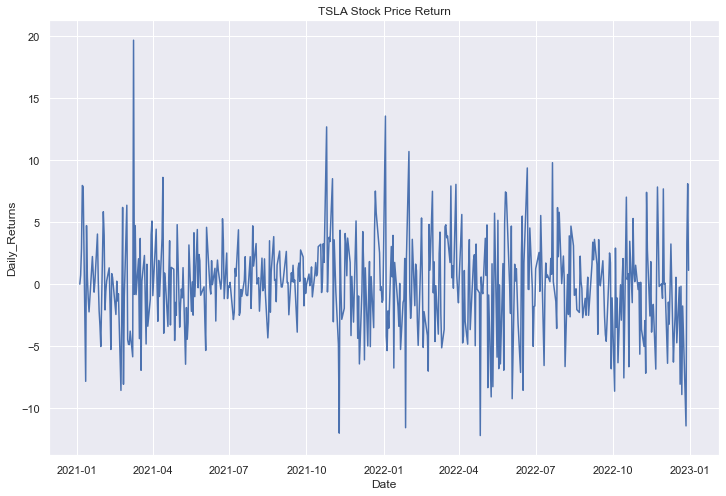

In [9]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.lineplot(y=TSLA_df.Daily_Returns,x=TSLA_df.index).set(title = 'TSLA Stock Price Return')

[Text(0.5, 1.0, 'SP500 Stock Price Return')]

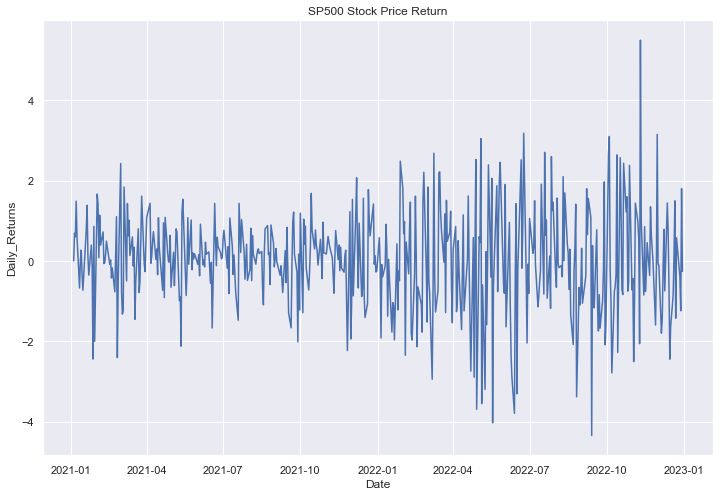

In [10]:
sns.lineplot(y=SP500_df.Daily_Returns,x=TSLA_df.index).set(title = 'SP500 Stock Price Return')

In [11]:
## Fit a polynomial to sp 500 and and TSLA
beta, alpha = np.polyfit(SP500_df.Daily_Returns,TSLA_df.Daily_Returns,1)
print('Beta for {} stock is = {} and alpha is = {}'.format('TSLA', round(beta,3), round(alpha,3)))

Beta for TSLA stock is = 1.783 and alpha is = -0.088


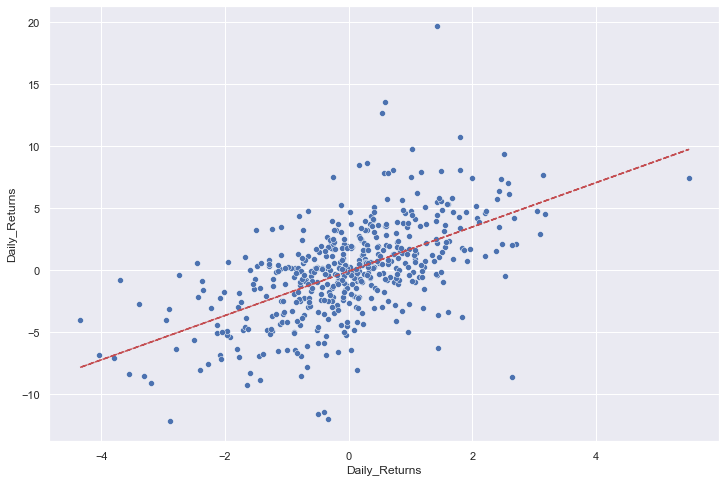

In [12]:
sns.scatterplot(x=SP500_df.Daily_Returns,y=TSLA_df.Daily_Returns)
plt.plot(SP500_df.Daily_Returns,beta * SP500_df.Daily_Returns + alpha, '--', color = 'r')

## Calculating Expected return based on CAPM

In [13]:
#  https://tradingeconomics.com/united-states/government-bond-yield
rf = 3.40

#  calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
rm = round(SP500_df.Daily_Returns.mean() * 252 * 2,3)

In [14]:
print(" Beta = ",beta)
#  https://tradingeconomics.com/united-states/government-bond-yield
print(" rf = ",rf)
print("rm = ",rm)

 Beta =  1.7829394324787002
 rf =  3.4
rm =  7.437


In [15]:
Expected_Return_Tesla = round(rf + (beta * ( rm - rf)),3)
print(Expected_Return_Tesla)

10.598


## Doubts
1. Do we need to normalize based on initial price?
2. How should returns be calculated ( percentage return vs Close - Open)
3. Meaning of 




# Fama and french 3 factor model

In [16]:
import getFamaFrenchFactors as gff
from sklearn.preprocessing import StandardScaler

In [17]:
df_ff3_monthly = gff.famaFrench3Factor(frequency='m') 
df_ff3_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
df_ff3_monthly.set_index('Date',inplace=True)

In [18]:
TSLA_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
Date,,,,,,,
2021-01-04 00:00:00-05:00,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000
2021-01-05 00:00:00-05:00,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737
2021-01-06 00:00:00-05:00,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030
2021-01-07 00:00:00-05:00,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656
2021-01-08 00:00:00-05:00,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299


In [19]:
df_ff3_daily = df_ff3_monthly.resample('D').interpolate()

In [20]:
# Shift data one day ahead so previous days data is considered for current
df_ff3_daily.shift(1)
df_ff3_daily.dropna(inplace=True)

In [21]:
df_ff3_daily.tz_localize(None)
df_ff3_daily.reset_index(inplace=True)
TSLA_df.reset_index(inplace=True)

In [22]:
df_ff3_daily.tail(5)

,Date,Mkt-RF,SMB,HML,RF
35244,2023-01-27,0.049648,0.042932,-0.033832,0.003474
35245,2023-01-28,0.053861,0.044774,-0.035574,0.003481
35246,2023-01-29,0.058074,0.046616,-0.037316,0.003487
35247,2023-01-30,0.062287,0.048458,-0.039058,0.003494
35248,2023-01-31,0.066500,0.050300,-0.040800,0.003500


In [23]:
TSLA_df['Date'] = pd.to_datetime(TSLA_df['Date']).dt.date
df_ff3_daily['Date'] = pd.to_datetime(TSLA_df['Date']).dt.date

In [24]:
TSLA_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
0,2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000
1,2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737
2,2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030
3,2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656
4,2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299


In [25]:
df_ff3_daily.head()

,Date,Mkt-RF,SMB,HML,RF
0,2021-01-04,0.029600,-0.025600,-0.024300,0.002200
1,2021-01-05,0.029497,-0.025152,-0.022284,0.002210
2,2021-01-06,0.029394,-0.024703,-0.020268,0.002219
3,2021-01-07,0.029290,-0.024255,-0.018252,0.002229
4,2021-01-08,0.029187,-0.023806,-0.016235,0.002239


In [26]:
ff_tsla_data = df_ff3_daily.merge(TSLA_df,on='Date')

In [27]:
df_ff3_daily[df_ff3_daily.Date == '2021-01-05']

,Date,Mkt-RF,SMB,HML,RF


In [28]:
ff_tsla_data.head()

,Date,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
0,2021-01-04,0.029600,-0.025600,-0.024300,0.002200,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000
1,2021-01-05,0.029497,-0.025152,-0.022284,0.002210,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737
2,2021-01-06,0.029394,-0.024703,-0.020268,0.002219,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030
3,2021-01-07,0.029290,-0.024255,-0.018252,0.002229,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656
4,2021-01-08,0.029187,-0.023806,-0.016235,0.002239,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299


In [29]:
ff_tsla_data.dropna(inplace=True)

In [30]:
X = ff_tsla_data[['Mkt-RF', 'SMB', 'HML']].values
y =  ff_tsla_data['Close'].values.reshape(-1, 1)


# Scale the target variable using StandardScaler
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y)

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


# Make predictions on the testing data
y_pred = model.predict(X_test)

# Undo the scaling on the predicted values and the true values
y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

# Evaluate the model's performance using mean squared error
mse = ((y_pred_unscaled - y_test_unscaled)**2).mean()
print("Mean Squared Error:", mse)

Mean Squared Error: 2921.3737378638534


## PCA prediction using OBV, 3 days closing price and Fama French Factors



In [181]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import getFamaFrenchFactors as gff
import statsmodels.api as sm

from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y:%m:%d')

# Download Tesla stock data for 1000 days
start_date = datetime(2018,1,1)
end_date = datetime(2022,1,1)
ticker = "TSLA"
df = yf.download(ticker, start=start_date, end=end_date)
# df_sp500 = yf.download('SPY',start_date,end_date)


# ads_data = pd.read_excel("ads_slice.xlsx", parse_dates=['Date'], date_parser=dateparse)
# print(ads_data.head(5))
# # stock_data = yf.download(ticker, start, end)
# new_ads_data = ads_data[['Date', 'ADS_INDEX_031623']].set_index('Date')

# new_ads_data.tz_localize(None)
# new_ads_data.reset_index(inplace=True)
# new_ads_data['Date'] = pd.to_datetime(new_ads_data['Date']).dt.date

# print(tmp_x)
# X = tmp_x.reset_index(drop=True)
# X = sm.add_constant(X)

# Calculate On Balance Volume (OBV)
df['daily_return'] = df['Adj Close'].pct_change()
df['direction'] = np.where(df['daily_return'] >= 0, 1, -1)
df['direction'][0] = 0
df['vol_adjusted'] = df['Volume'] * df['direction']
df['OBV'] = df['vol_adjusted'].cumsum()
df['SP500_ADJ_CLOSE'] = df_sp500['Adj Close']

# Calculate Fama French 3 factors
ff_data = gff.famaFrench3Factor(frequency='m') 


ff_data.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
ff_data.set_index('Date',inplace=True)
ff_data = ff_data.resample('D').interpolate()
ff_data.tz_localize(None)
ff_data.reset_index(inplace=True)
df.reset_index(inplace=True)

df['Date'] = pd.to_datetime(df['Date']).dt.date
ff_data['Date'] = pd.to_datetime(ff_data['Date']).dt.date

# Merge data together to create dataframe
df = ff_data.merge(df,on='Date')

# df = new_ads_data.merge(df, on="Date")


df['Fama_French_Mkt_RF'] = ff_data['Mkt-RF']
df['Fama_French_SMB'] = ff_data['SMB']
df['Fama_French_HML'] = ff_data['HML']

# df.head()
# # Create dataframe for PCA
closing_price = df['Adj Close']

df_pca = pd.DataFrame({'Closing Price 1': closing_price.shift(1), 
                       'Closing Price 2': closing_price.shift(2), 
                       'Closing Price 3': closing_price.shift(3), 
                       'OBV': df['OBV'].shift(1), 
                       'Mkt-RF': df['Mkt-RF'].shift(1), 
                       'SMB': df['SMB'].shift(1), 
                       'HML': df['HML'].shift(1)})
#                         'SP500_ADJ_CLOSE': df['ADS_INDEX_031623'].shift(1)})

# Dropping null values
df_pca.dropna(inplace=True)

print(df_pca.head(5))

# Applying PCA
scaler = StandardScaler()
pca = PCA(n_components=3)

# Fit the scaler and PCA on the data
X = scaler.fit_transform(df_pca)
X = sm.add_constant(X)
pca.fit(X)

# Extract the top 3 principal components
top_3_pca = pca.transform(X)[:, :3]

# Splitting data into training and testing sets
train_size = int(len(top_3_pca) * 0.7)
train_data, test_data = top_3_pca[:train_size], top_3_pca[train_size:]

train_y, test_y = closing_price.values[3:train_size+3], closing_price.values[train_size+3:]

# Training the linear regression model
reg = LinearRegression()
reg.fit(train_data, train_y)

# Predicting on test data
test_pred = reg.predict(test_data)


test_y = test_y.reshape(-1, 1)
test_pred = test_pred.reshape(-1, 1)

# Calculating regression metrics
rmse = np.sqrt(mean_squared_error(test_y, test_pred))
r2 = r2_score(test_y, test_pred)

print("RMSE: ", rmse)
print("R Squared: ", r2)

[*********************100%***********************]  1 of 1 completed


/var/folders/2s/jbd9m2gj61n3fk0zl36lyp940000gn/T/ipykernel_85625/3700894658.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'][0] = 0


   Closing Price 1  Closing Price 2  Closing Price 3          OBV    Mkt-RF  \
3        20.974667        21.150000        21.368668 -217017000.0  0.016419   
4        21.105333        20.974667        21.150000 -148149000.0  0.017874   
5        22.427334        21.105333        20.974667    -258000.0  0.022239   
6        22.246000        22.427334        21.105333 -107457000.0  0.023694   
7        22.320000        22.246000        22.427334  -42808500.0  0.025148   

        SMB       HML  
3 -0.015561 -0.001281  
4 -0.016152 -0.001726  
5 -0.017923 -0.003061  
6 -0.018513 -0.003506  
7 -0.019103 -0.003952  
RMSE:  33.5363179065569
R Squared:  0.6818743985465041


In [188]:
pred_all = reg.predict(top_3_pca)
df_plot = df[['Date','Adj Close']]
df_plot = df_plot.iloc[3:]
df_plot['Predicted Close'] = pred_all
df_plot['Diff Close'] =  df_plot['Predicted Close'] - df_plot['Adj Close'] 



In [189]:
sum(df_plot['Diff Close'])

-8104.463381066882

<AxesSubplot:>

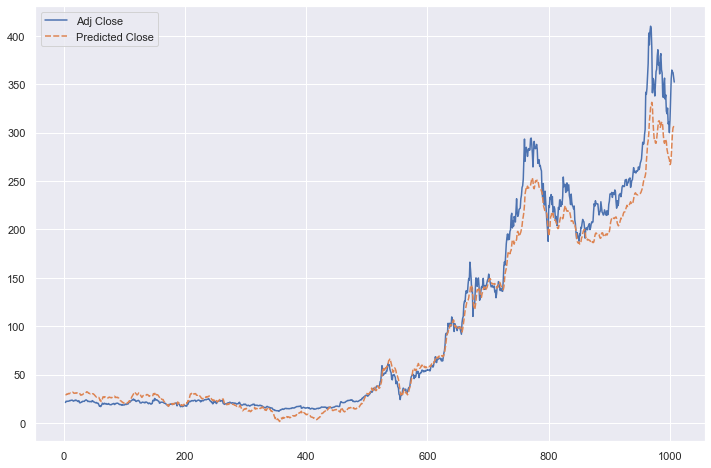

In [186]:
sns.lineplot(data=df_plot[['Adj Close','Predicted Close']])